In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Clean_Dataset.csv")

In [4]:
df.shape

(300153, 12)

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.drop(["Unnamed: 0","flight"], axis = 1, inplace = True)

In [7]:
pd.DataFrame({"dtypes" :df.dtypes, "nunique" : df.nunique(), "null" : df.isnull().sum()}).T

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
dtypes,object,object,object,object,object,object,object,float64,int64,int64
nunique,6,6,6,3,6,6,2,476,49,12157
null,0,0,0,0,0,0,0,0,0,0


In [14]:
col_to_category = ["airline","source_city","departure_time", "stops", "arrival_time", "class", "destination_city"]

ordinal_cols = ["class"]

In [16]:
df[col_to_category] = df[col_to_category].astype("category")

In [18]:
pd.DataFrame({"dtypes" :df.dtypes, "nunique" : df.nunique(), "null" : df.isnull().sum()}).T

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
dtypes,category,category,category,category,category,category,category,float64,int64,int64
nunique,6,6,6,3,6,6,2,476,49,12157
null,0,0,0,0,0,0,0,0,0,0


# duplicates

In [21]:
df.duplicated().sum()

2213

In [23]:
df.drop_duplicates(inplace = True)

In [25]:
df.reset_index(drop = True)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
297935,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
297936,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
297937,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
297938,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           297940 non-null  category
 1   source_city       297940 non-null  category
 2   departure_time    297940 non-null  category
 3   stops             297940 non-null  category
 4   arrival_time      297940 non-null  category
 5   destination_city  297940 non-null  category
 6   class             297940 non-null  category
 7   duration          297940 non-null  float64 
 8   days_left         297940 non-null  int64   
 9   price             297940 non-null  int64   
dtypes: category(7), float64(1), int64(2)
memory usage: 11.1 MB


# handle outlires

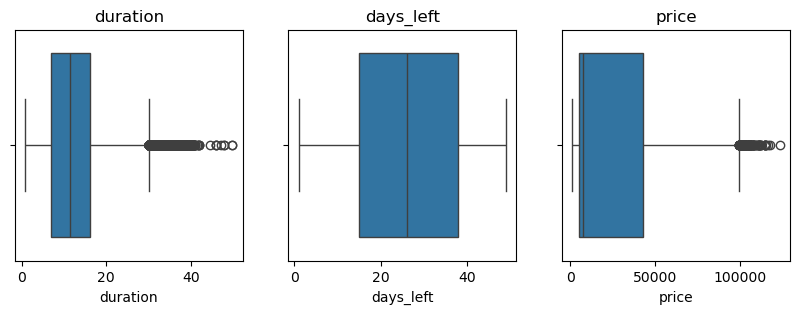

In [30]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize = (10,3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df[col], orient = "h")
    plt.title(col)

In [31]:
cols = ["duration"]
for i in cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    df = df[(df[i] > lower) & (df[i] < upper)] 
    #upper_outlires = df[df["duration"] > upper][i].values
    #lower_outlires = df[df["duration"] < lower][i].values

    #df[i] = df[i].replace(upper_outlires, upper)
    #df[i] = df[i].replace(lower_outlires, lower)

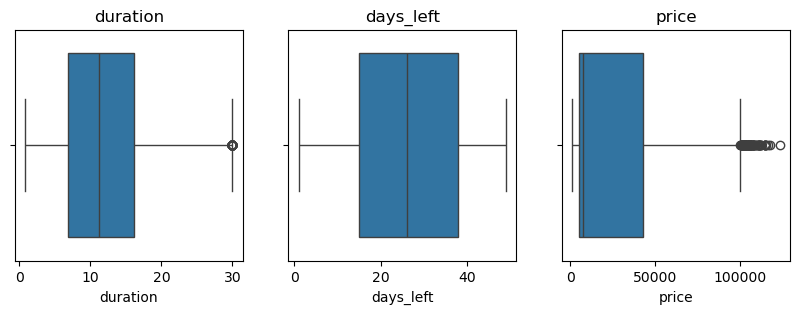

In [32]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize = (10,3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df[col], orient = "h")
    plt.title(col)

In [36]:
df.shape

(295714, 10)

### nominal columns

In [39]:
col_to_category.remove("class")
nominal = col_to_category
nominal

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city']

In [41]:
df = pd.get_dummies(data = df, columns = nominal, drop_first = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295714 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   class                         295714 non-null  category
 1   duration                      295714 non-null  float64 
 2   days_left                     295714 non-null  int64   
 3   price                         295714 non-null  int64   
 4   airline_Air_India             295714 non-null  int64   
 5   airline_GO_FIRST              295714 non-null  int64   
 6   airline_Indigo                295714 non-null  int64   
 7   airline_SpiceJet              295714 non-null  int64   
 8   airline_Vistara               295714 non-null  int64   
 9   source_city_Chennai           295714 non-null  int64   
 10  source_city_Delhi             295714 non-null  int64   
 11  source_city_Hyderabad         295714 non-null  int64   
 12  source_city_Kolkata           29571

In [45]:
bool = df.select_dtypes("bool").columns
for i in bool:
    df[i] = df[i].apply(lambda x : x * 1)

### ordinal columns

In [49]:
#for col in df.select_dtypes(include = ["category"]).columns:
mean_price = df.groupby("class")['price'].mean()
df["class"] = df["class"].map(mean_price.rank().astype("int"))

C:\Users\Mx\AppData\Local\Temp\ipykernel_19372\1983737596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = df.groupby("class")['price'].mean()


In [51]:
df["class"] = df["class"].astype(int) 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295714 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   class                         295714 non-null  int32  
 1   duration                      295714 non-null  float64
 2   days_left                     295714 non-null  int64  
 3   price                         295714 non-null  int64  
 4   airline_Air_India             295714 non-null  int64  
 5   airline_GO_FIRST              295714 non-null  int64  
 6   airline_Indigo                295714 non-null  int64  
 7   airline_SpiceJet              295714 non-null  int64  
 8   airline_Vistara               295714 non-null  int64  
 9   source_city_Chennai           295714 non-null  int64  
 10  source_city_Delhi             295714 non-null  int64  
 11  source_city_Hyderabad         295714 non-null  int64  
 12  source_city_Kolkata           295714 non-null  in

In [55]:
df

,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,2.17,1,5953,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2.33,1,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,2.17,1,5956,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,2.25,1,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,2.33,1,5955,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,10.08,49,69265,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
300149,2,10.42,49,77105,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300150,2,13.83,49,79099,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300151,2,10.00,49,81585,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [57]:
x = df.drop("price", axis = 1)
y = df["price"]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector


# scaling

In [62]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [64]:
pd.DataFrame(x_sc).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,...,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05,2.957140e+05
mean,-1.384015e-16,-1.197557e-16,-7.688972e-17,6.372236e-17,1.362870e-16,-4.498049e-17,2.076023e-17,3.806041e-17,6.151178e-17,-4.555716e-17,...,6.766296e-17,-3.874521e-17,5.382281e-17,-3.556150e-18,-1.254264e-17,-1.557017e-17,6.843185e-17,7.304524e-17,2.014511e-16,-1.164879e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-6.767605e-01,-1.620818e+00,-1.847701e+00,-6.062816e-01,-2.902653e-01,-4.095166e-01,-1.734428e-01,-8.624517e-01,-3.832617e-01,-5.060281e-01,...,-2.334647e-01,-5.926675e-01,-2.215683e-01,-5.152546e-01,-6.610104e-01,-3.939091e-01,-4.862279e-01,-4.077698e-01,-4.446923e-01,-4.949763e-01
25%,-6.767605e-01,-7.599772e-01,-8.143867e-01,-6.062816e-01,-2.902653e-01,-4.095166e-01,-1.734428e-01,-8.624517e-01,-3.832617e-01,-5.060281e-01,...,-2.334647e-01,-5.926675e-01,-2.215683e-01,-5.152546e-01,-6.610104e-01,-3.939091e-01,-4.862279e-01,-4.077698e-01,-4.446923e-01,-4.949763e-01
50%,-6.767605e-01,-1.258246e-01,-2.496680e-03,-6.062816e-01,-2.902653e-01,-4.095166e-01,-1.734428e-01,-8.624517e-01,-3.832617e-01,-5.060281e-01,...,-2.334647e-01,-5.926675e-01,-2.215683e-01,-5.152546e-01,-6.610104e-01,-3.939091e-01,-4.862279e-01,-4.077698e-01,-4.446923e-01,-4.949763e-01
75%,1.477628e+00,5.671522e-01,8.832016e-01,1.649398e+00,-2.902653e-01,-4.095166e-01,-1.734428e-01,1.159485e+00,-3.832617e-01,-5.060281e-01,...,-2.334647e-01,1.687287e+00,-2.215683e-01,-5.152546e-01,1.512835e+00,-3.939091e-01,-4.862279e-01,-4.077698e-01,-4.446923e-01,-4.949763e-01
max,1.477628e+00,2.564303e+00,1.695092e+00,1.649398e+00,3.445124e+00,2.441903e+00,5.765588e+00,1.159485e+00,2.609183e+00,1.976175e+00,...,4.283302e+00,1.687287e+00,4.513281e+00,1.940788e+00,1.512835e+00,2.538657e+00,2.056649e+00,2.452364e+00,2.248746e+00,2.020299e+00


In [66]:
ms = MinMaxScaler()
x_ms = ms.fit_transform(x)

In [68]:
pd.DataFrame(x_ms).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,...,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000,295714.000000
mean,0.314131,0.387281,0.521538,0.268780,0.077707,0.143618,0.029204,0.426547,0.128076,0.203863,...,0.051688,0.259947,0.046795,0.209791,0.304074,0.134322,0.191212,0.142570,0.165102,0.196788
std,0.464170,0.238942,0.282264,0.443326,0.267710,0.350703,0.168378,0.494576,0.334175,0.402869,...,0.221398,0.438606,0.211200,0.407160,0.460015,0.340999,0.393256,0.349635,0.371273,0.397571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.205691,0.291667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.357216,0.520833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.522797,0.770833,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x_ms, y, test_size = 0.30, random_state = 45,shuffle=True)

In [114]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [116]:
lr.score(x_train, y_train)

0.9116169947607843

In [118]:
lr.score(x_test, y_test)

0.9115132405762669

In [120]:
y_pred = lr.predict(x_test)

In [122]:
lr.score(x_test, y_pred)

1.0

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [126]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

45961317.79192694
4587.584129725382


In [128]:
pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred}).head(15)

,y_test,y_pred
242353,49613,51957.189004
285375,63579,51899.351033
201179,4594,7415.661966
103442,13258,14752.931049
247709,42521,51337.543492
280471,56702,55767.814496
142199,7979,6261.994852
182716,4048,8259.742172
31445,10355,5805.534469
240184,45693,48835.582750
